In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:


X_full = pd.read_csv('../input/home-data-for-ml-course/train.csv', index_col = 'Id')
X_test_full = pd.read_csv('../input/home-data-for-ml-course/test.csv', index_col = 'Id')

X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)



X_full.shape


(1460, 79)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X_full.select_dtypes(exclude='object').describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00


In [4]:
X_full.select_dtypes(include='object').describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Exploring Numerical Columns

In [7]:
X_full.select_dtypes(exclude = 'object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [8]:
len(X_full.select_dtypes(exclude = 'object').columns)

36

In [9]:
X_full.select_dtypes(exclude = 'object').describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Distribution of Attributes

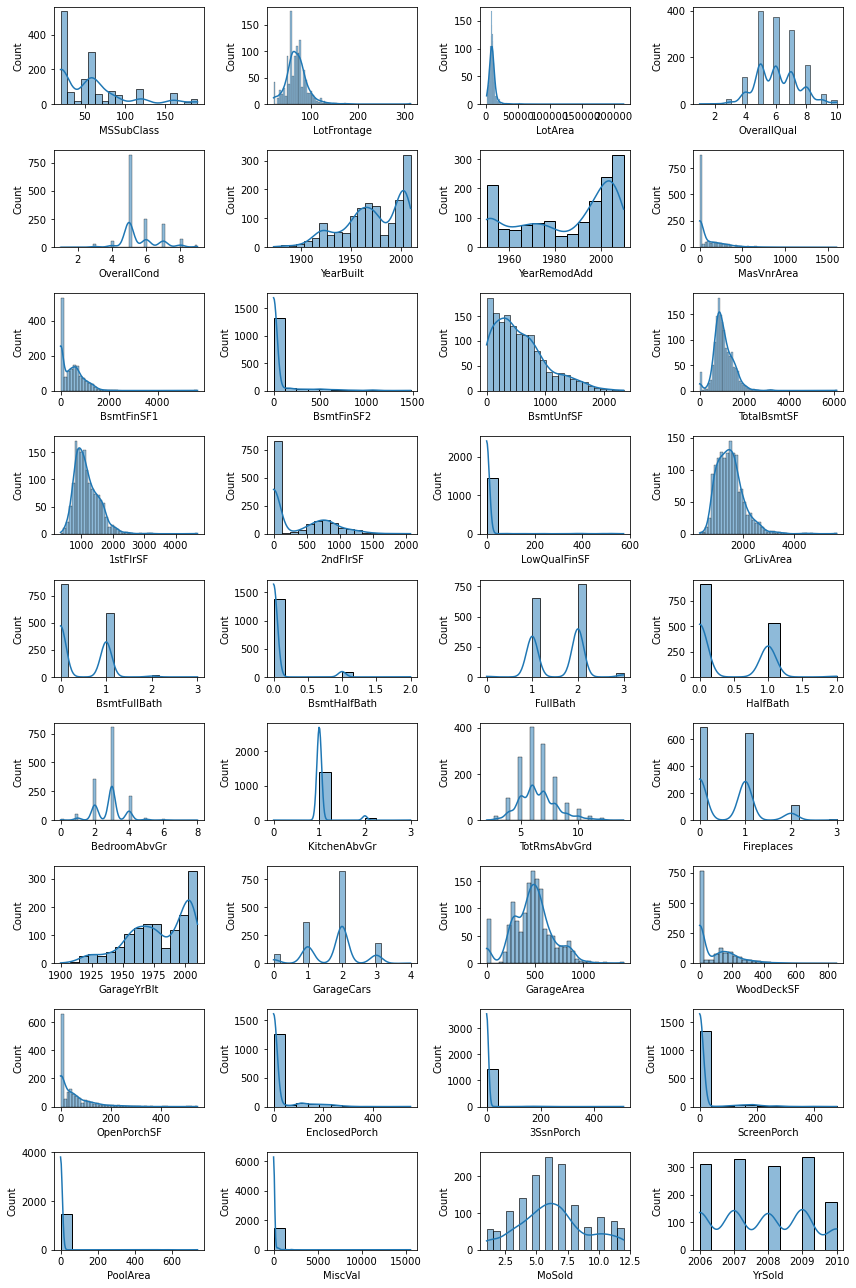

In [10]:
num_cols2 = X_full.select_dtypes(exclude = 'object').copy() 

fig = plt.figure(figsize=(12,18))

for i in range (len(num_cols2.columns)):
    fig.add_subplot(9,4,i+1)
    sns.histplot(num_cols2.iloc[:, i].dropna(), kde = 'True')
    plt.xlabel(num_cols2.columns[i])
plt.tight_layout()
plt.show()

Finding Outliers 

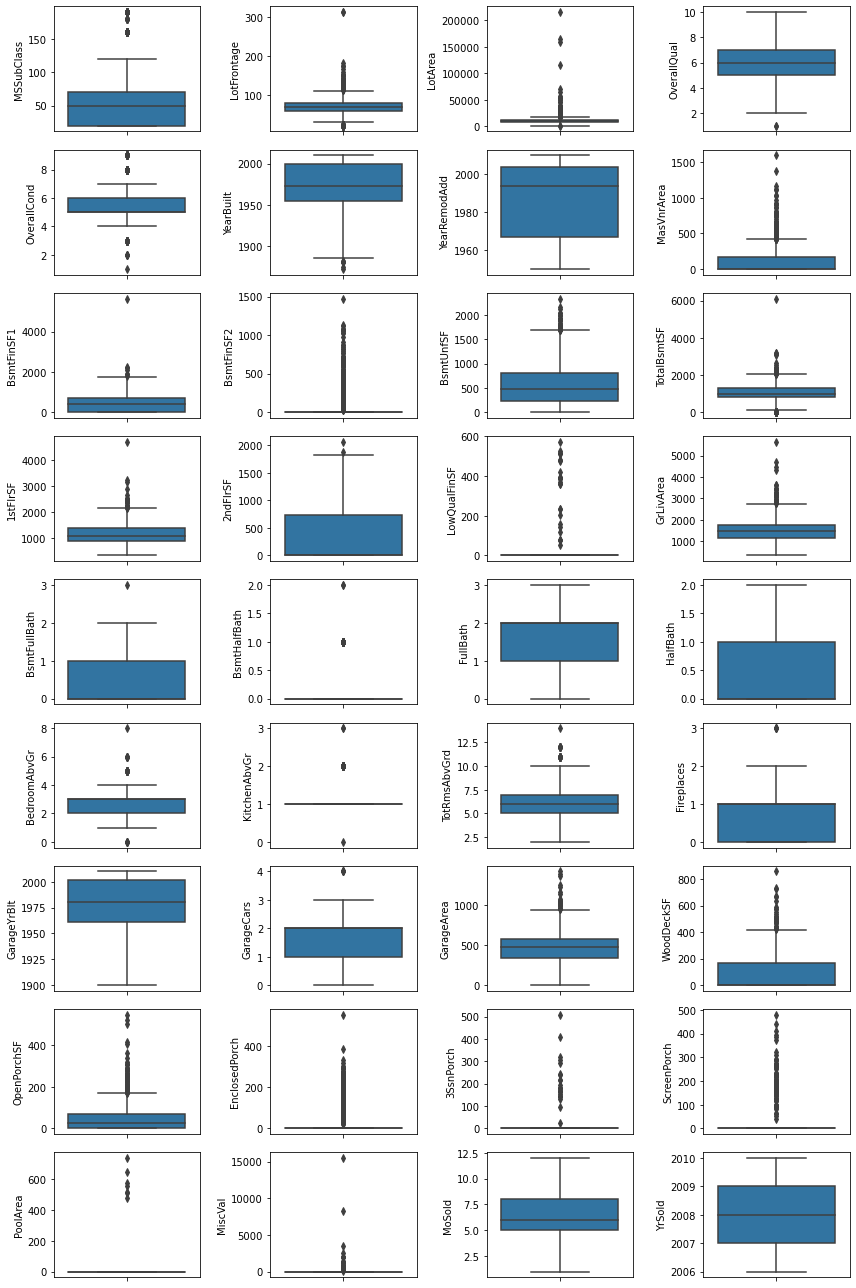

In [11]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_cols2.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_cols2.iloc[:,i])

plt.tight_layout()
plt.show()

Bivariate analysis using Scatter plots

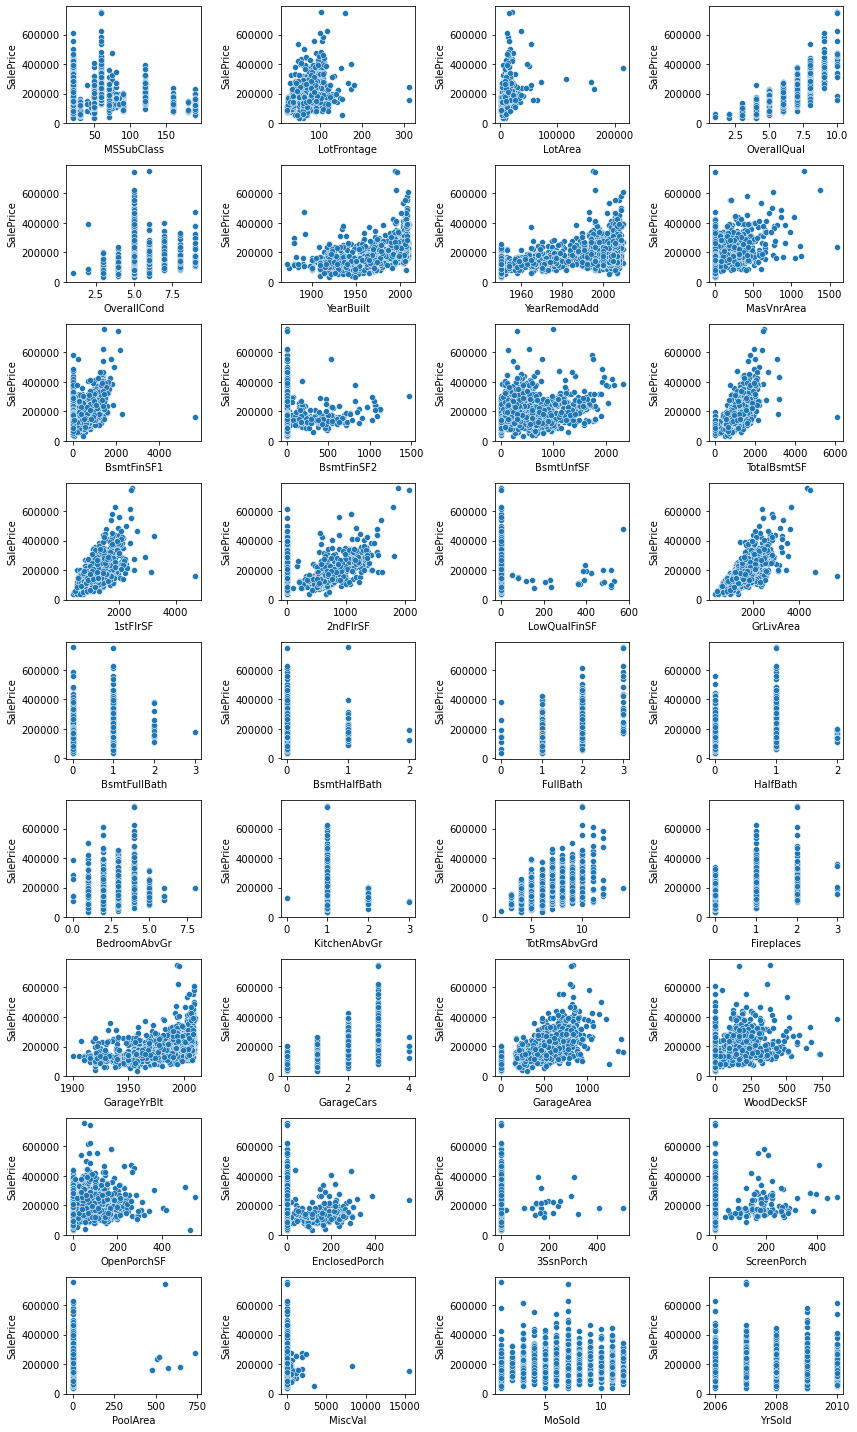

In [12]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_cols2.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(x = num_cols2.iloc[:,i], y=y)
    
plt.tight_layout()
plt.show()


Correlation with Sales Price

In [13]:
X_copy = X_full.copy() 
X_copy['SalePrice'] = y
correlations = X_copy.corr()


In [14]:
correlations['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

data preprocessing

In [15]:
X_copy = X_copy.drop(X_copy['LotFrontage']
                                     [X_copy['LotFrontage']>200].index)
X_copy = X_copy.drop(X_copy['LotArea']
                                     [X_copy['LotArea']>100000].index)
X_copy = X_copy.drop(X_copy['BsmtFinSF1']
                                     [X_copy['BsmtFinSF1']>4000].index)
X_copy = X_copy.drop(X_copy['TotalBsmtSF']
                                     [X_copy['TotalBsmtSF']>6000].index)
X_copy = X_copy.drop(X_copy['1stFlrSF']
                                     [X_copy['1stFlrSF']>4000].index)
X_copy = X_copy.drop(X_copy['LotFrontage']
                                     [X_copy['LotFrontage']>200].index)
X_copy = X_copy.drop(X_copy.GrLivArea
                                     [(X_copy['GrLivArea']>4000) & 
                                      (y<300000)].index)
X_copy = X_copy.drop(X_copy.LowQualFinSF
                                     [X_copy['LowQualFinSF']>550].index)


In [16]:
X_copy['SalePrice'] = np.log(X_copy['SalePrice'])
X_copy = X_copy.rename(columns={'SalePrice': 'SalePrice_log'})

In [17]:
from sklearn.model_selection import train_test_split 
y = X_copy.SalePrice_log
X_copy.drop(['SalePrice_log'], axis=1, inplace=True)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_copy, y, train_size=0.8, test_size = 0.2, random_state=0)

In [18]:
y_train.head()

Id
534    10.578980
188    11.813030
157    11.603680
316    12.146853
9      11.774520
Name: SalePrice_log, dtype: float64

In [19]:
categorical_cols = [cname for cname in X_train_full.columns if
                   X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == 'object']

numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols
X_copy = X_copy[my_cols].copy()
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = SimpleImputer(strategy = 'constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



In [21]:
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [22]:
def inv_y(transformed_y):
    return np.exp(transformed_y)

mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [23]:
# Define model
rf_model = RandomForestRegressor(n_estimators=100, random_state=5)

# Bundle preprocessing and modeling code in a pipeline
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', rf_model)
                     ])

# Preprocessing of training data, fit model 
rf_clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = rf_clf.predict(X_valid) 
rf_val_mae = mean_absolute_error(inv_y(y_valid), inv_y(preds))
mae_compare['RandomForest'] = rf_val_mae



#XGBRegressor-------------------------------------------------------------------------------------------------------------------- 
XGB_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
XGB_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', XGB_model)
                     ])

# Preprocessing of training data, fit model 
XGB_clf.fit(X_train, y_train)
xgb_val_predictions = XGB_clf.predict(X_valid)
xgb_val_mae = mean_absolute_error(inv_y(y_valid), inv_y(xgb_val_predictions))

mae_compare['XGBoost'] = xgb_val_mae


#linear Regression =========================================================
lr_model = LinearRegression()
lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', lr_model)
                     ])

# Preprocessing of training data, fit model 
lr_clf.fit(X_train, y_train)
linear_val_predictions = lr_clf.predict(X_valid)
linear_val_mae = mean_absolute_error(inv_y(y_valid), inv_y(xgb_val_predictions))

mae_compare['LinearRegression'] = linear_val_mae

#lasso==================================================================================
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', lasso_model)
                     ])

# Preprocessing of training data, fit model 
lasso_clf.fit(X_train, y_train)
lasso_val_predictions = lasso_clf.predict(X_valid)
lasso_val_mae = mean_absolute_error(inv_y(y_valid), inv_y(xgb_val_predictions))

mae_compare['Lasso'] = lasso_val_mae


#ridge========================================================================
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', ridge_model)
                     ])

# Preprocessing of training data, fit model 
ridge_clf.fit(X_train, y_train)
ridge_val_predictions = ridge_clf.predict(X_valid)
ridge_val_mae = mean_absolute_error(inv_y(y_valid), inv_y(ridge_val_predictions))

mae_compare['Ridge'] = ridge_val_mae


#gradient boosting ==================================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', gbr_model)
                     ])

# Preprocessing of training data, fit model 
gbr_clf.fit(X_train, y_train)
gbr_val_predictions = gbr_clf.predict(X_valid)
gbr_val_mae = mean_absolute_error(inv_y(y_valid), inv_y(gbr_val_predictions))

mae_compare['Gradient Boosting'] = gbr_val_mae



print('MAE values for different algorithms:')
mae_compare.sort_values(ascending=True).round()

MAE values for different algorithms:


Algorithm
Ridge                13776.0
Gradient Boosting    14270.0
XGBoost              15076.0
LinearRegression     15076.0
Lasso                15076.0
RandomForest         15926.0
dtype: float64

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso_clf, X_train, y_train, scoring='neg_mean_squared_error', 
                         cv=10)
lasso_mae_scores = np.sqrt(-scores)

print('For LASSO model:')
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

For LASSO model:
Mean RMSE = 0.115
Error std deviation = 0.017


In [25]:
scores = cross_val_score(ridge_clf, X_train, y_train, scoring='neg_mean_squared_error', 
                         cv=10)
ridge_mae_scores = np.sqrt(-scores)

print('For Ridge model:')
print('Mean RMSE = ' + str(ridge_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(ridge_mae_scores.std().round(decimals=3)))

For Ridge model:
Mean RMSE = 0.137
Error std deviation = 0.024


In [26]:
scores = cross_val_score(XGB_clf, X_train, y_train, scoring='neg_mean_squared_error', 
                         cv=10)
XGB_mae_scores = np.sqrt(-scores)

print('For XGB model:')
print('Mean RMSE = ' + str(XGB_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(XGB_mae_scores.std().round(decimals=3)))

For XGB model:
Mean RMSE = 0.125
Error std deviation = 0.017


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'alpha': [0.0007, 0.0005, 0.005]}]
top_reg = Lasso()
top_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', top_reg)
                     ])
# -------------------------------------------------------
grid_search = GridSearchCV(top_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
top_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', grid_search)
                     ])

top_clf.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.0005}

In [28]:
final_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', Lasso(alpha=0.0005, random_state=5))
                     ])
final_model.fit(X_train, y_train)

test_preds = final_model.predict(X_test)


In [29]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': inv_y(test_preds)})
output.to_csv('submission.csv', index=False)